In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
address=os.getcwd()

In [110]:
os.listdir(r'./data')

['sample_submit.csv', 'test.csv', 'train.csv']

In [111]:
train=pd.read_csv(r'./data/train.csv')
print("train:",train.shape)
test=pd.read_csv(r'./data/test.csv')
print("test:",test.shape)
train.head()

train: (6000, 1602)
test: (5191, 1601)


,id,p_0_0,p_0_1,p_0_2,p_0_3,p_0_4,p_0_5,p_0_6,p_0_7,p_0_8,...,p_39_31,p_39_32,p_39_33,p_39_34,p_39_35,p_39_36,p_39_37,p_39_38,p_39_39,y
0,0,216,39,206,148,89,58,108,88,201,...,108,181,70,203,57,108,101,243,18,1
1,1,83,165,103,185,54,56,90,84,1,...,164,60,47,45,157,236,47,73,209,0
2,2,253,150,255,90,223,100,154,52,31,...,145,145,254,93,31,11,230,97,205,1
3,3,53,138,138,165,244,19,84,126,20,...,106,67,103,92,218,128,214,87,233,0
4,4,227,55,120,245,154,255,230,87,224,...,52,8,251,224,64,34,38,194,113,0


Figure 1 训练数据部分图形展示.


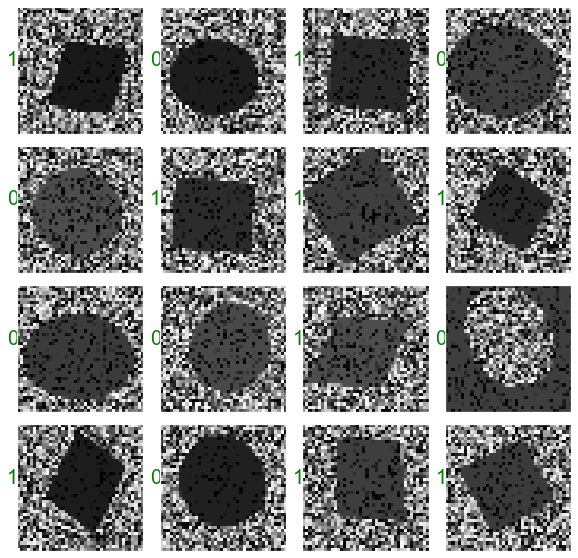

In [23]:
# 绘图
fig, axes = plt.subplots(4, 4, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.mat(np.array(train.iloc[i,1:-1]).reshape(40,40)), cmap='binary', interpolation='nearest')
    #ax.text(0.05, 0.05, str(train.iloc[i,-1]),
    #        transform=ax.transAxes, color='red',fontsize=20)
    ax.set_ylabel(str(train.iloc[i,-1]),rotation=0,fontsize=20,color='green')
print("Figure 1 训练数据部分图形展示.")
#    
# plt.imshow(np.mat(np.array(train.iloc[0,1:-1]).reshape(40,40)))

Figure 2 测试数据部分图形展示.


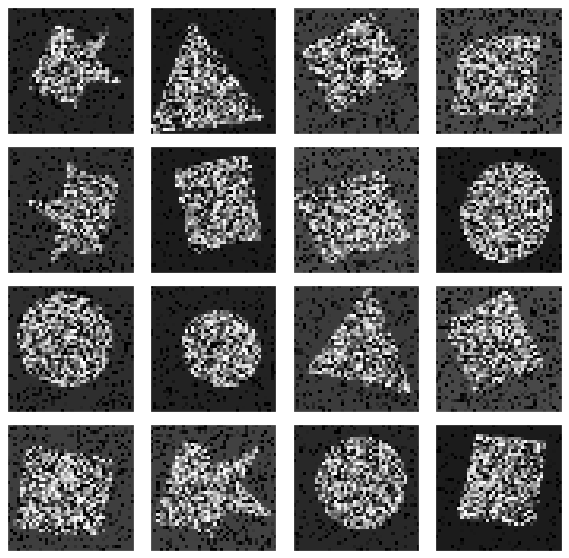

In [26]:
# 绘图
fig, axes = plt.subplots(4, 4, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.mat(np.array(test.iloc[i,1:]).reshape(40,40)), cmap='binary', interpolation='nearest')
    #ax.text(0.05, 0.05, str(train.iloc[i,-1]),
    #        transform=ax.transAxes, color='red',fontsize=20)
    #ax.set_ylabel(str(test.iloc[i,-1]),rotation=0,fontsize=20,color='green')
print("Figure 2 测试数据部分图形展示.")

In [112]:
# 划分数据集
# 划分数据集
X = train.iloc[:,1:-1].values
print(X.shape)
Y = train["y"]
print(Y.shape)

(6000, 1600)
(6000,)


In [81]:
# # 流形学习算法中的Isomap算法对数据进行降维
# from sklearn.manifold import Isomap
# iso = Isomap(n_components=2)
# iso.fit(X)
# data_projected = iso.transform(X)
# data_projected.shape

# plt.scatter(data_projected[:, 0], data_projected[:, 1], c=Y, s=20,
#             edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('Spectral', 2))
# plt.colorbar(label='digit label', ticks=range(2))
# plt.clim(-0.5, 1.5)

In [113]:
# 数字分类
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

# from sklearn.naive_bayes import GaussianNB
# from sklearn.decomposition import PCA  # 1.选择模型类
# from sklearn.pipeline import make_pipeline
# #model = PCA()            # 2.设置超参数，初始化模型

# model = make_pipeline(PCA(),GaussianNB())
# model.fit(Xtrain, ytrain)
# y_model = model.predict(Xtest)

# #from sklearn.metrics import accuracy_score
# accuracy_score(ytest, y_model)

# 图像分类

In [102]:
# SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

pca = PCA(n_components=0.95,whiten=True, random_state=42)           # n_components=150
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 22min 37s
{'svc__C': 5, 'svc__gamma': 0.001}


              precision    recall  f1-score   support

           0       0.52      0.51      0.52       762
           1       0.51      0.52      0.51       738

   micro avg       0.51      0.51      0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500

精确度: 0.5146666666666667


(2, 0)

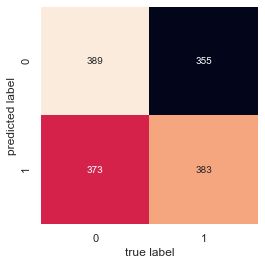

In [103]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))#,
#                            target_names=[0,1]))
print("精确度:",accuracy_score(ytest, yfit))

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.ylim([2,0])

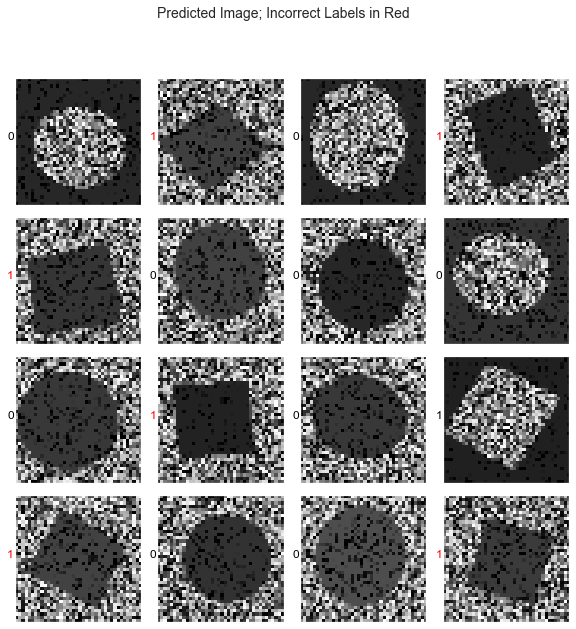

In [52]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, axi in enumerate(axes.flat):
    axi.imshow(np.mat(np.array(Xtest.iloc[i,:]).reshape(40, 40)), cmap='binary', interpolation='nearest')
    #axi.set(xticks=[], yticks=[])
    axi.set_ylabel(ytest.iloc[i],
                   color='black' if yfit[i] == ytest.iloc[i] else 'red',rotation=0)
fig.suptitle('Predicted Image; Incorrect Labels in Red', size=14);

In [114]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(Xtrain,ytrain)
yfit1=model.predict(Xtest)

              precision    recall  f1-score   support

           0       0.52      0.51      0.52       762
           1       0.51      0.52      0.51       738

   micro avg       0.51      0.51      0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500

精确度: 0.5146666666666667


(2, 0)

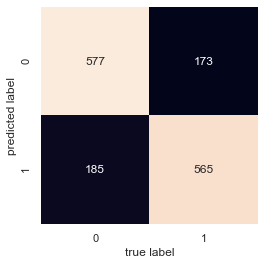

In [115]:
print(classification_report(ytest, yfit))#,
#                            target_names=[0,1]))
print("精确度:",accuracy_score(ytest, yfit))

mat = confusion_matrix(ytest, yfit1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.ylim([2,0])